# Importing Packages 

In [1]:
# Import pandas
import pandas as pd
# Import Natural Language Toolkit
import nltk
# Import numpy
import numpy as np
# Import seaborn
import seaborn as sns
# Import pyplot
import matplotlib.pyplot as plt
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Importing data set 

In [2]:
# Import tweets data set 

path = './data/'
filename = 'tweets.csv'

try:
    df = pd.read_csv(path+filename)
except FileNotFoundError:
    # If data is not found, download it from GitHub
    import os
    os.system(f'git clone --single-branch --depth=1 https://github.com/DeltaAnalytics/machine_learning_for_good_data {path}')
    df = pd.read_csv(path+filename)
    
    
df.head(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


## Removing the columns that are not needed

In [3]:
# Select out columns of interest into new data set 'tweets'

tweet_corpus = pd.DataFrame(df[['airline_sentiment', 'text']]).copy()

tweets = df[['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'airline', 'retweet_count', 'text', 'tweet_created', 'tweet_location', 'user_timezone']].copy()

tweets.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
airline                          object
retweet_count                     int64
text                             object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

## Distribution of sentiments

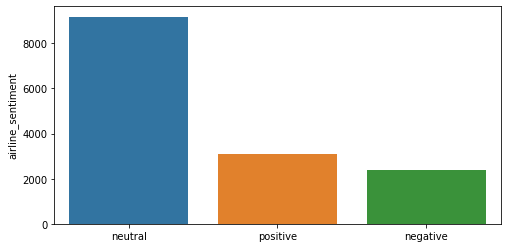

In [4]:
# Plot of the count of the different sentiments aligned to tweets in the dataset

fig = plt.figure(figsize=(8,4))
sns.barplot(x = tweets['airline_sentiment'].unique(), y=tweets['airline_sentiment'].value_counts())
plt.show()




In [5]:
# Numeric count of the different sentiments aligned to tweets in the dataset

tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Counts of Tweets for the different airlines

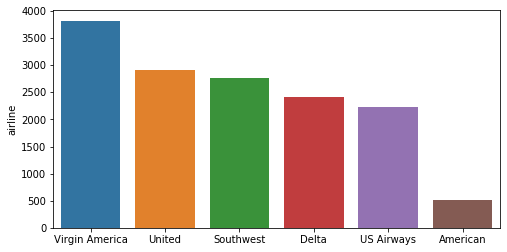

In [6]:
# Plot count of tweets from the different airlines

fig = plt.figure(figsize=(8,4))
sns.barplot(x = tweets['airline'].unique(), y=tweets['airline'].value_counts())
plt.show()

In [7]:
# Numeric count of tweets from the different airlines

tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

## Cleaning the text data

In [8]:
import re
import string

# Create text cleaning function

def cleaning_text(text):
    #Make text lowercase .'''
    text = text.lower()
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaning = lambda x: cleaning_text(x)

In [9]:
# Clean text

tweet_clean = pd.DataFrame(tweet_corpus['text'].apply(cleaning))

tweet_clean.head(10)

,text
0,virginamerica what dhepburn said
1,virginamerica plus youve added commercials to ...
2,virginamerica i didnt today must mean i need t...
3,virginamerica its really aggressive to blast o...
4,virginamerica and its a really big bad thing a...
5,virginamerica seriously would pay a flight fo...
6,virginamerica yes nearly every time i fly vx t...
7,virginamerica really missed a prime opportunit...
8,virginamerica well i didnt…but now i do d
9,virginamerica it was amazing and arrived an ho...






lematization?


look into word frequency chart







## Wordcloud

In [10]:
# Join all the text data together into one doc

text = " ".join(text for text in tweet_clean.text)


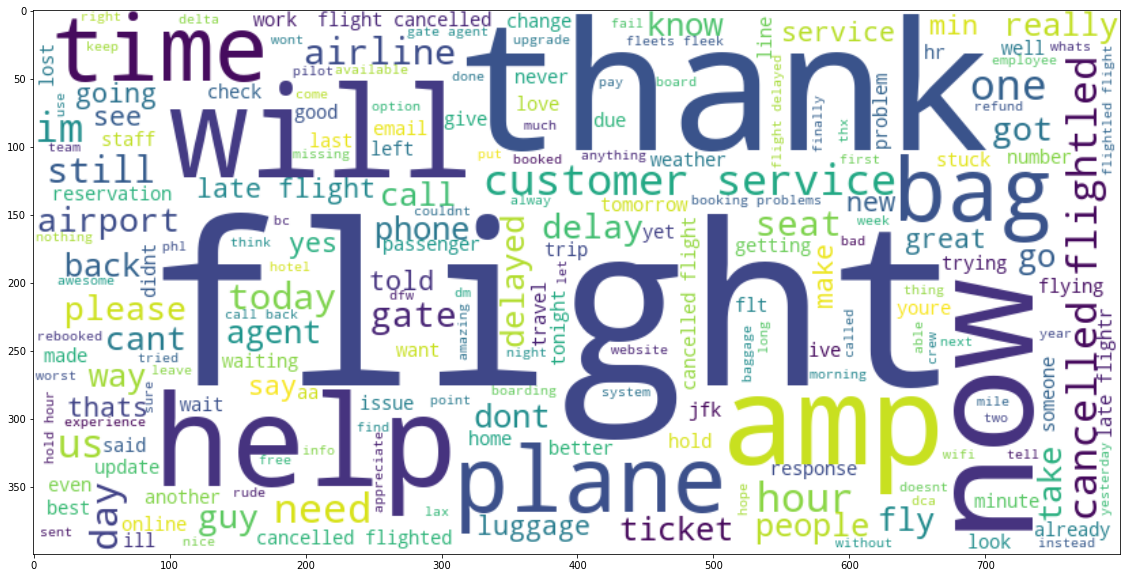

In [11]:
from wordcloud import WordCloud, STOPWORDS

# Create list of stopwords
my_stopwords = set(STOPWORDS)
my_stopwords.update(['USAirway','United','AmericanAir', 'SouthwestAir', 'VirginAmerica', 'USAirways', "JetBlue"])

# Create Wordcloud
my_cloud = WordCloud(width=800, height=400, background_color='white', stopwords=my_stopwords).generate(text) 

# Plot Wordcloud

plt.figure( figsize=(20,10) )
plt.tight_layout(pad=0)
plt.imshow(my_cloud, interpolation='bilinear')

#plt.savefig("air_tweet.png", format="png")


## Document Term Matrix

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS


# Create stop words list

my_stop_words = ENGLISH_STOP_WORDS
my_stopwords.update(['USAirway','United','AmericanAir', 'SouthwestAir', 'VirginAmerica', 'USAirways', "JetBlue"])

# Use count vectorizer to create a document term matrix

cv = CountVectorizer(stop_words= my_stop_words, min_df = 3)
data_cv = cv.fit_transform(tweet_clean.text)
doc_term_mat = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
doc_term_mat.index = tweet_clean.index
doc_term_mat

,aa,aadvantage,aarp,aas,abc,ability,able,aboard,abq,absolute,...,yr,yrs,yuma,yup,yvr,yyz,zero,zkatcher,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Move the doc_term_mat into the data frame tweet_dtm

tweet_dtm = pd.DataFrame(doc_term_mat)


# Add dependent variable sentiment to the tweet_dtm data frame

tweet_dtm['sentiment'] = tweet_corpus['airline_sentiment']


## Dimension Reduction - SVD

In [14]:
# Create list containing all features from the doc term matrix

feature_cols = tweet_dtm.columns.values.tolist()

feature_cols.remove('sentiment')

# designate X and y

X = tweet_dtm[feature_cols]
y = tweet_dtm.sentiment


In [15]:
from numpy import *
import operator
import matplotlib.pyplot as plt
import pandas as pd


#calculate SVD
n = 100 # We will take two Singular Values
U, s, V = linalg.svd( X )


# eye() creates a matrix with ones on the diagonal and zeros elsewhere
Sig = mat(eye(n)*s[:n])
newdata = U[:,:n]
newdata = pd.DataFrame(newdata)
newdata.columns=['SVD1','SVD2','SVD3','SVD4','SVD5','SVD6','SVD7','SVD8','SVD9','SVD10',
                'SVD11','SVD12','SVD13','SVD14','SVD15','SVD16','SVD17','SVD18','SVD19','SVD20',
                'SVD21','SVD22','SVD23','SVD24','SVD25','SVD26','SVD27','SVD28','SVD29','SVD30',
                'SVD31','SVD32','SVD33','SVD34','SVD35','SVD36','SVD37','SVD38','SVD39','SVD40',
                'SVD41','SVD42','SVD43','SVD44','SVD45','SVD46','SVD47','SVD48','SVD49','SVD50',
                'SVD51','SVD52','SVD53','SVD54','SVD55','SVD56','SVD57','SVD58','SVD59','SVD60',
                'SVD61','SVD62','SVD63','SVD64','SVD65','SVD66','SVD67','SVD68','SVD69','SVD70',
                'SVD71','SVD72','SVD73','SVD74','SVD75','SVD76','SVD77','SVD78','SVD79','SVD80',
                'SVD81','SVD82','SVD83','SVD84','SVD85','SVD86','SVD87','SVD88','SVD89','SVD90',
                'SVD91','SVD92','SVD93','SVD94','SVD95','SVD96','SVD97','SVD98','SVD99','SVD100']
newdata.head()

,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10,...,SVD91,SVD92,SVD93,SVD94,SVD95,SVD96,SVD97,SVD98,SVD99,SVD100
0,0.000373,-0.000084,0.000012,-0.000030,0.000242,0.000221,0.000138,0.000256,0.000364,-0.002443,...,0.009350,-0.012450,0.010678,0.009103,-0.000788,0.009517,-0.011591,-0.006634,0.011916,0.013491
1,0.000529,0.000042,0.000144,0.000031,0.000328,0.000399,0.000651,0.000194,0.000437,-0.002188,...,-0.005930,0.007459,-0.000739,-0.005583,0.004941,-0.005104,0.000208,-0.011076,0.017247,0.016225
2,0.001703,-0.000356,0.000659,-0.000480,0.001007,0.001785,-0.000781,-0.002002,-0.000713,-0.000222,...,0.018769,-0.013990,0.008113,0.008652,-0.015086,-0.030875,-0.009155,-0.003137,0.021117,-0.011823
3,0.001292,-0.000123,0.000605,-0.000093,0.001245,0.001355,-0.000137,-0.000651,-0.001551,-0.002835,...,0.000563,-0.004383,0.004080,-0.004882,-0.000547,0.001446,0.000893,0.002128,-0.005573,-0.005239
4,0.000748,-0.000003,0.000277,-0.000262,0.000804,0.000861,0.000448,0.000596,0.000486,-0.001867,...,0.001827,-0.002610,0.002095,0.005839,0.006428,-0.013486,-0.000264,0.004661,0.020387,-0.003095


## Using Negative sentiment vs all other


In [36]:
from pandas import DataFrame

# Create list containing all features from the doc term matrix

tweet_dtm.loc[tweet_dtm['sentiment'] == 'negative', 'binary_sentiment'] = 'negative' 
tweet_dtm.loc[tweet_dtm['sentiment'] == 'positive', 'binary_sentiment'] = 'not negative'
tweet_dtm.loc[tweet_dtm['sentiment'] == 'neutral', 'binary_sentiment'] = 'not negative'

# designate X and y

Xbin = tweet_dtm[feature_cols]
ybin = tweet_dtm.binary_sentiment

ybin

0        not negative
1        not negative
2        not negative
3            negative
4            negative
             ...     
14635    not negative
14636        negative
14637    not negative
14638        negative
14639    not negative
Name: binary_sentiment, Length: 14640, dtype: object

In [37]:
from numpy import *
import operator
import matplotlib.pyplot as plt
import pandas as pd


#calculate SVD
n = 100 # We will take two Singular Values
U, s, V = linalg.svd( Xbin )


# eye() creates a matrix with ones on the diagonal and zeros elsewhere
Sig = mat(eye(n)*s[:n])
newdata2 = U[:,:n]
newdata2 = pd.DataFrame(newdata)
newdata2.columns=['SVD1','SVD2','SVD3','SVD4','SVD5','SVD6','SVD7','SVD8','SVD9','SVD10',
                'SVD11','SVD12','SVD13','SVD14','SVD15','SVD16','SVD17','SVD18','SVD19','SVD20',
                'SVD21','SVD22','SVD23','SVD24','SVD25','SVD26','SVD27','SVD28','SVD29','SVD30',
                'SVD31','SVD32','SVD33','SVD34','SVD35','SVD36','SVD37','SVD38','SVD39','SVD40',
                'SVD41','SVD42','SVD43','SVD44','SVD45','SVD46','SVD47','SVD48','SVD49','SVD50',
                'SVD51','SVD52','SVD53','SVD54','SVD55','SVD56','SVD57','SVD58','SVD59','SVD60',
                'SVD61','SVD62','SVD63','SVD64','SVD65','SVD66','SVD67','SVD68','SVD69','SVD70',
                'SVD71','SVD72','SVD73','SVD74','SVD75','SVD76','SVD77','SVD78','SVD79','SVD80',
                'SVD81','SVD82','SVD83','SVD84','SVD85','SVD86','SVD87','SVD88','SVD89','SVD90',
                'SVD91','SVD92','SVD93','SVD94','SVD95','SVD96','SVD97','SVD98','SVD99','SVD100']
newdata2.head()

,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10,...,SVD91,SVD92,SVD93,SVD94,SVD95,SVD96,SVD97,SVD98,SVD99,SVD100
0,0.000373,-0.000084,0.000012,-0.000030,0.000242,0.000221,0.000138,0.000256,0.000364,-0.002443,...,0.009350,-0.012450,0.010678,0.009103,-0.000788,0.009517,-0.011591,-0.006634,0.011916,0.013491
1,0.000529,0.000042,0.000144,0.000031,0.000328,0.000399,0.000651,0.000194,0.000437,-0.002188,...,-0.005930,0.007459,-0.000739,-0.005583,0.004941,-0.005104,0.000208,-0.011076,0.017247,0.016225
2,0.001703,-0.000356,0.000659,-0.000480,0.001007,0.001785,-0.000781,-0.002002,-0.000713,-0.000222,...,0.018769,-0.013990,0.008113,0.008652,-0.015086,-0.030875,-0.009155,-0.003137,0.021117,-0.011823
3,0.001292,-0.000123,0.000605,-0.000093,0.001245,0.001355,-0.000137,-0.000651,-0.001551,-0.002835,...,0.000563,-0.004383,0.004080,-0.004882,-0.000547,0.001446,0.000893,0.002128,-0.005573,-0.005239
4,0.000748,-0.000003,0.000277,-0.000262,0.000804,0.000861,0.000448,0.000596,0.000486,-0.001867,...,0.001827,-0.002610,0.002095,0.005839,0.006428,-0.013486,-0.000264,0.004661,0.020387,-0.003095


## Creating the Training and Test Data Sets for Regular Dependent Variable

### No dimension Reduction

In [38]:
from sklearn.model_selection import train_test_split



# Set seed

RSEED = 50

# Split data set into train and test data sets

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=0)

# Split training data set into train and validation data sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

### Dimension Reduction

In [39]:
# Set seed

RSEED = 50

# Split data set into train and test data sets

X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split (newdata, y, random_state=0)

# Split training data set into train and validation data sets

X_train_svd, X_val_svd, y_train_svd, y_val_svd = train_test_split(X_train_svd, y_train_svd, test_size=0.2, random_state=1)

## Creating the Training and Test Data Sets For Binary Dependent Variables

### No dimension Reduction

In [40]:

# Set seed

RSEED = 50

# Split data set into train and test data sets

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split (Xbin, ybin, random_state=0)

# Split training data set into train and validation data sets

X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X_train_bin, y_train_bin, test_size=0.2, random_state=1)

### Dimension Reduction

In [42]:
# Set seed

RSEED = 50

# Split data set into train and test data sets

X_train_svd_bin, X_test_svd_bin, y_train_svd_bin, y_test_svd_bin = train_test_split (newdata2, ybin, random_state=0)

# Split training data set into train and validation data sets

X_train_svd_bin, X_val_svd_bin, y_train_svd_bin, y_val_svd_bin = train_test_split(X_train_svd_bin, y_train_svd_bin, test_size=0.2, random_state=1)

## Creating Function For Classifier Models

In [23]:
from sklearn import metrics

#

def train_score_classifier(sklearn_classifier, X_train, y_train, X_val, y_val, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Initializing the sklearn regressor 
    
    classifier = sklearn_classifier()
    
    # Define model parameters
    
    classifier.set_params(**model_parameters)


    # Fit training data to the classifier
    
    classifier.fit(X_train,y_train)
    
    # Calculate the classifier's predictions for the training and validation data sets
    
    y_pred_train = classifier.predict(X_train)
    
    y_pred_val = classifier.predict(X_val)
    
    # Calculate the accuracy of the model predictions for the training data set
    
    train_acc = metrics.accuracy_score(y_train, y_pred_train)
    
    # Calculate the accuracy of the model predictions for the validation data set
    
    val_acc = metrics.accuracy_score(y_val, y_pred_val)
    
    # Calculate the confusion matrix for the model predictions for the validation data set
    
    val_cm = metrics.confusion_matrix(y_val, y_pred_val)
   
    class_rep = metrics.classification_report(y_val, y_pred_val, digits=3)

    # Print results
 
    print('\nThe accuracy for the training data is:')
    print(train_acc)
    
    
    print('\nThe accuracy for the validation data is:')
    print(val_acc)
    
    print('\nThe confusion matrix for the validation data is:')
    print (val_cm)
    
    print('\nThe classification report for the validation data is:')
    print(class_rep)
    
    return classifier

## Random Forest - No Dimension Reduction - Regular Dependent Variable

In [19]:
from sklearn.ensemble import RandomForestClassifier


# Create a random forest Classifier

clf = RandomForestClassifier

# run base version of random forrest model 

rf_classifier = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters={'n_estimators':100, 'random_state':42})





The accuracy for the training data is:
0.9926001821493625

The accuracy for the validation data is:
0.7390710382513661

The confusion matrix for the validation data is:
[[1156  163   43]
 [ 171  234   55]
 [  88   53  233]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.817     0.849     0.833      1362
     neutral      0.520     0.509     0.514       460
    positive      0.704     0.623     0.661       374

    accuracy                          0.739      2196
   macro avg      0.680     0.660     0.669      2196
weighted avg      0.736     0.739     0.737      2196



In [20]:



# assign paramater values for grid search

parameters_rf = {'n_estimators': [150, 200, 250, 300],
               'max_depth': [12, 15, 18, 21],
               'min_samples_split':[2, 3, 4],
               'min_samples_leaf': [1, 2, 3],
               'bootstrap': [True, False]}


# assign random forest classifier to rf
rf= RandomForestClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters
gsc = GridSearchCV(rf, parameters_rf)
gsc.fit(X_train,y_train)







/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [21]:

# Get the optimal hyperparameters from the grid search
 
gsc.best_estimator_.get_params() 



{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [22]:

# Run the random forest classifier with the optomized hyperparameters

rf_classifier_gs = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters=gsc.best_estimator_.get_params())



The accuracy for the training data is:
0.6634790528233151

The accuracy for the validation data is:
0.6425318761384335

The confusion matrix for the validation data is:
[[1360    2    0]
 [ 438   22    0]
 [ 341    4   29]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.636     0.999     0.777      1362
     neutral      0.786     0.048     0.090       460
    positive      1.000     0.078     0.144       374

    accuracy                          0.643      2196
   macro avg      0.807     0.375     0.337      2196
weighted avg      0.729     0.643     0.525      2196



## Random Forrest - SVD Dimension Reduction

In [23]:

# Run a basic random forest classifier

rf_classifier_svd = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters={'n_estimators':100, 'random_state':42})


The accuracy for the training data is:
0.9926001821493625

The accuracy for the validation data is:
0.726775956284153

The confusion matrix for the validation data is:
[[1282   56   24]
 [ 277  142   41]
 [ 168   34  172]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.742     0.941     0.830      1362
     neutral      0.612     0.309     0.410       460
    positive      0.726     0.460     0.563       374

    accuracy                          0.727      2196
   macro avg      0.693     0.570     0.601      2196
weighted avg      0.712     0.727     0.697      2196



In [24]:

# assign paramater values for grid search

parameters_rf = {'n_estimators': [150, 200, 250, 300],
               'max_depth': [12, 15, 18, 21],
               'min_samples_split':[2, 3, 4],
               'min_samples_leaf': [1, 2, 3],
               'bootstrap': [True, False]}


# assign random forest classifier to rf
rf= RandomForestClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters
gsc_svd = GridSearchCV(rf, parameters_rf)
gsc_svd.fit(X_train_svd,y_train_svd)




/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [25]:

# Get the optimal hyperparameters from the grid search
 
gsc_svd.best_estimator_.get_params() 



{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
# Run the random forest classifier with the optomized hyperparameters

rf_classifier_gs_svd = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters=gsc_svd.best_estimator_.get_params())




The accuracy for the training data is:
0.9890710382513661

The accuracy for the validation data is:
0.7295081967213115

The confusion matrix for the validation data is:
[[1278   62   22]
 [ 275  147   38]
 [ 163   34  177]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.745     0.938     0.830      1362
     neutral      0.605     0.320     0.418       460
    positive      0.747     0.473     0.579       374

    accuracy                          0.730      2196
   macro avg      0.699     0.577     0.609      2196
weighted avg      0.716     0.730     0.701      2196



## Random Forest - No Dimension Reduction - Binary Dependent Variable

In [45]:
from sklearn.ensemble import RandomForestClassifier


# Create a random forest Classifier

clf = RandomForestClassifier

# run base version of random forrest model 

rf_classifier_bin = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_val_bin, 
                                          y_val=y_val_bin, 
                                          model_parameters={'n_estimators':100, 'random_state':42})


The accuracy for the training data is:
0.9964708561020036

The accuracy for the validation data is:
0.7864298724954463

The confusion matrix for the validation data is:
[[1117  245]
 [ 224  610]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.833     0.820     0.826      1362
not negative      0.713     0.731     0.722       834

    accuracy                          0.786      2196
   macro avg      0.773     0.776     0.774      2196
weighted avg      0.788     0.786     0.787      2196



In [48]:

# assign paramater values for grid search

parameters_rf = {'n_estimators': [150, 200, 250, 300],
               'max_depth': [12, 15, 18, 21],
               'min_samples_split':[2, 3, 4],
               'min_samples_leaf': [1, 2, 3],
               'bootstrap': [True, False]}


# assign random forest classifier to rf
rf= RandomForestClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters
gsc_bin = GridSearchCV(rf, parameters_rf)
gsc_bin.fit(X_train_bin,y_train_bin)


/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [49]:
# Get the optimal hyperparameters from the grid search
 
gsc_bin.best_estimator_.get_params() 


{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [50]:

# Run the random forest classifier with the optomized hyperparameters

rf_classifier_gs_bin = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_val_bin, 
                                          y_val=y_val_bin, 
                                          model_parameters=gsc_bin.best_estimator_.get_params())


The accuracy for the training data is:
0.7735655737704918

The accuracy for the validation data is:
0.7244990892531876

The confusion matrix for the validation data is:
[[1336   26]
 [ 579  255]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.698     0.981     0.815      1362
not negative      0.907     0.306     0.457       834

    accuracy                          0.724      2196
   macro avg      0.803     0.643     0.636      2196
weighted avg      0.777     0.724     0.679      2196



## Random Forest - Dimension Reduction - Binary Dependent Variable

In [51]:

# Run a basic random forest classifier

rf_classifier_svd_bin = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters={'n_estimators':100, 'random_state':42})


The accuracy for the training data is:
0.9964708561020036

The accuracy for the validation data is:
0.7759562841530054

The confusion matrix for the validation data is:
[[1235  127]
 [ 365  469]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.772     0.907     0.834      1362
not negative      0.787     0.562     0.656       834

    accuracy                          0.776      2196
   macro avg      0.779     0.735     0.745      2196
weighted avg      0.778     0.776     0.766      2196



In [52]:
# assign paramater values for grid search

parameters_rf = {'n_estimators': [150, 200, 250, 300],
               'max_depth': [12, 15, 18, 21],
               'min_samples_split':[2, 3, 4],
               'min_samples_leaf': [1, 2, 3],
               'bootstrap': [True, False]}


# assign random forest classifier to rf
rf= RandomForestClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters
gsc_svd_bin = GridSearchCV(rf, parameters_rf)
gsc_svd_bin.fit(X_train_svd_bin,y_train_svd_bin)


/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [53]:
# Get the optimal hyperparameters from the grid search
 
gsc_svd_bin.best_estimator_.get_params() 


{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [54]:
# Run the random forest classifier with the optomized hyperparameters

rf_classifier_gs_svd_bin = train_score_classifier(sklearn_classifier=clf,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters=gsc_svd_bin.best_estimator_.get_params())



The accuracy for the training data is:
0.9857695810564663

The accuracy for the validation data is:
0.779143897996357

The confusion matrix for the validation data is:
[[1222  140]
 [ 345  489]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.780     0.897     0.834      1362
not negative      0.777     0.586     0.668       834

    accuracy                          0.779      2196
   macro avg      0.779     0.742     0.751      2196
weighted avg      0.779     0.779     0.771      2196



## Support Vector Machine - No Dimension Reduction

In [27]:
from sklearn.svm import SVC


#Create a svm Classifier

clf_svm = SVC


# run a base SVM for a linear kernal

lin_svm_classifier = train_score_classifier(sklearn_classifier=clf_svm,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters={'random_state':42,
                                                            'kernel':'linear'})


The accuracy for the training data is:
0.9264571948998178

The accuracy for the validation data is:
0.7636612021857924

The confusion matrix for the validation data is:
[[1155  158   49]
 [ 149  260   51]
 [  62   50  262]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.846     0.848     0.847      1362
     neutral      0.556     0.565     0.560       460
    positive      0.724     0.701     0.712       374

    accuracy                          0.764      2196
   macro avg      0.708     0.705     0.706      2196
weighted avg      0.764     0.764     0.764      2196



In [ ]:

# assign paramater values for grid search

parameters_svm = {'C':[1, 3, 5, 7],
                  'kernel':['rbf','linear', 'poly', 'sigmoid'],
                  'gamma':[1, 3, 5, 7]}


# assign SVM classifier to svm_cf

svm_cf= SVC(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc2 = GridSearchCV(svm_cf, parameters_svm)
gsc2.fit(X_train,y_train)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:

# Get the optimal hyperparameters from the grid search

gsc2.best_estimator_.get_params() 

In [ ]:

# Run the SVM classifier with the optomized hyperparameters

svm_classifier_gs = train_score_classifier(sklearn_classifier=clf_svm,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters=gsc2.best_estimator_.get_params())

## Support Vector Machine -SVD Dimension Reduction



In [28]:
# run a base SVM for a linear kernal

lin_svm_classifier_svd = train_score_classifier(sklearn_classifier=clf_svm,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters={'random_state':42,
                                                            'kernel':'linear'})



The accuracy for the training data is:
0.6253415300546448

The accuracy for the validation data is:
0.6202185792349727

The confusion matrix for the validation data is:
[[1362    0    0]
 [ 460    0    0]
 [ 374    0    0]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.620     1.000     0.766      1362
     neutral      0.000     0.000     0.000       460
    positive      0.000     0.000     0.000       374

    accuracy                          0.620      2196
   macro avg      0.207     0.333     0.255      2196
weighted avg      0.385     0.620     0.475      2196



/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
# assign paramater values for grid search

parameters_svm = {'C':[1, 3, 5, 7],
                  'kernel':['rbf','linear', 'poly', 'sigmoid'],
                  'gamma':[1, 3, 5, 7]}


# assign SVM classifier to svm_cf

svm_cf= SVC(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc2_svd = GridSearchCV(svm_cf, parameters_svm)
gsc2_svd.fit(X_train_svd,y_train_svd)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 3, 5, 7], 'gamma': [1, 3, 5, 7],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:

# Get the optimal hyperparameters from the grid search

gsc2_svd.best_estimator_.get_params() 




{'C': 7,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 7,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
# Run the SVM classifier with the optomized hyperparameters

svm_classifier_gs_svd = train_score_classifier(sklearn_classifier=clf_svm,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters=gsc2_svd.best_estimator_.get_params())




The accuracy for the training data is:
0.742827868852459

The accuracy for the validation data is:
0.7281420765027322

The confusion matrix for the validation data is:
[[1251   66   45]
 [ 272  140   48]
 [ 136   30  208]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.754     0.919     0.828      1362
     neutral      0.593     0.304     0.402       460
    positive      0.691     0.556     0.616       374

    accuracy                          0.728      2196
   macro avg      0.679     0.593     0.616      2196
weighted avg      0.710     0.728     0.703      2196



## Support Vector Machine - No Dimension Reduction - Binary Dependent Variable

In [76]:
from sklearn.svm import SVC


#Create a svm Classifier

clf_svm = SVC


# run a base SVM for a linear kernal

lin_svm_classifier_bin = train_score_classifier(sklearn_classifier=clf_svm,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_val_bin, 
                                          y_val=y_val_bin, 
                                          model_parameters={'random_state':42,
                                                            'kernel':'linear'})


The accuracy for the training data is:
0.9334016393442623

The accuracy for the validation data is:
0.8123861566484517

The confusion matrix for the validation data is:
[[1136  226]
 [ 186  648]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.859     0.834     0.846      1362
not negative      0.741     0.777     0.759       834

    accuracy                          0.812      2196
   macro avg      0.800     0.806     0.803      2196
weighted avg      0.815     0.812     0.813      2196



## Support Vector Machine -SVD Dimension Reduction - Binary Dependent Variable


In [56]:
# run a base SVM for a linear kernal

lin_svm_classifier_svd_bin = train_score_classifier(sklearn_classifier=clf_svm,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters={'random_state':42,
                                                            'kernel':'linear'})



The accuracy for the training data is:
0.6255692167577414

The accuracy for the validation data is:
0.6211293260473588

The confusion matrix for the validation data is:
[[1362    0]
 [ 832    2]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.621     1.000     0.766      1362
not negative      1.000     0.002     0.005       834

    accuracy                          0.621      2196
   macro avg      0.810     0.501     0.385      2196
weighted avg      0.765     0.621     0.477      2196



In [57]:
# assign paramater values for grid search

parameters_svm = {'C':[1, 3, 5, 7],
                  'kernel':['rbf','linear', 'poly', 'sigmoid'],
                  'gamma':[1, 3, 5, 7]}


# assign SVM classifier to svm_cf

svm_cf= SVC(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc2_svd_bin = GridSearchCV(svm_cf, parameters_svm)
gsc2_svd_bin.fit(X_train_svd_bin,y_train_svd_bin)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 3, 5, 7], 'gamma': [1, 3, 5, 7],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:

# Get the optimal hyperparameters from the grid search

gsc2_svd_bin.best_estimator_.get_params() 


{'C': 7,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 7,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [59]:
# Run the SVM classifier with the optomized hyperparameters

svm_classifier_gs_svd_bin = train_score_classifier(sklearn_classifier=clf_svm,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters=gsc2_svd_bin.best_estimator_.get_params())




The accuracy for the training data is:
0.7938296903460837

The accuracy for the validation data is:
0.7827868852459017

The confusion matrix for the validation data is:
[[1176  186]
 [ 291  543]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.802     0.863     0.831      1362
not negative      0.745     0.651     0.695       834

    accuracy                          0.783      2196
   macro avg      0.773     0.757     0.763      2196
weighted avg      0.780     0.783     0.780      2196



## Neural Network - No Dimension Reduction

In [32]:
from sklearn.neural_network import MLPClassifier


clf_nn = MLPClassifier

# run a basic neural network classifier

nn_classifier = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.9924863387978142

The accuracy for the validation data is:
0.7308743169398907

The confusion matrix for the validation data is:
[[1131  157   74]
 [ 157  231   72]
 [  72   59  243]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.832     0.830     0.831      1362
     neutral      0.517     0.502     0.509       460
    positive      0.625     0.650     0.637       374

    accuracy                          0.731      2196
   macro avg      0.658     0.661     0.659      2196
weighted avg      0.730     0.731     0.731      2196



In [33]:

# assign paramater values for grid search

parameters_nn = {'activation':['identity', 'logistic', 'tanh', 'relu'],
                 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate':['constant', 'invscaling', 'adaptive']}



# assign neural network classifier to nn

nn = MLPClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc3 = GridSearchCV(nn, parameters_nn)
gsc3.fit(X_train,y_train)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reache

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reache

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando..., shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'tanh'

In [34]:
# Get the optimal hyperparameters from the grid search

gsc3.best_estimator_.get_params() 




{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [35]:

# Run the neural network classifier with the optomized hyperparameters

nn_classifier_gs = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters=gsc3.best_estimator_.get_params())


The accuracy for the training data is:
0.8220628415300546

The accuracy for the validation data is:
0.7704918032786885

The confusion matrix for the validation data is:
[[1227   95   40]
 [ 178  235   47]
 [  88   56  230]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.822     0.901     0.860      1362
     neutral      0.609     0.511     0.556       460
    positive      0.726     0.615     0.666       374

    accuracy                          0.770      2196
   macro avg      0.719     0.676     0.694      2196
weighted avg      0.761     0.770     0.763      2196



/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Neural Network - SVD Dimension Reduction

In [36]:
# run a basic neural network classifier

nn_classifier_svd = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.7550091074681239

The accuracy for the validation data is:
0.7349726775956285

The confusion matrix for the validation data is:
[[1211   99   52]
 [ 228  187   45]
 [ 108   50  216]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.783     0.889     0.833      1362
     neutral      0.557     0.407     0.470       460
    positive      0.690     0.578     0.629       374

    accuracy                          0.735      2196
   macro avg      0.676     0.624     0.644      2196
weighted avg      0.720     0.735     0.722      2196



/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
# assign paramater values for grid search

parameters_nn = {'activation':['identity', 'logistic', 'tanh', 'relu'],
                 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate':['constant', 'invscaling', 'adaptive']}



# assign neural network classifier to nn

nn = MLPClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc3_svd = GridSearchCV(nn, parameters_nn)
gsc3_svd.fit(X_train_svd,y_train_svd)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reache

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando..., shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'tanh'

In [38]:
# Get the optimal hyperparameters from the grid search

gsc3_svd.best_estimator_.get_params() 


{'activation': 'identity',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [39]:
# Run the neural network classifier with the optomized hyperparameters

nn_classifier_gs_svd = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters=gsc3_svd.best_estimator_.get_params())


The accuracy for the training data is:
0.7489754098360656

The accuracy for the validation data is:
0.7290528233151184

The confusion matrix for the validation data is:
[[1201  110   51]
 [ 225  194   41]
 [ 116   52  206]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.779     0.882     0.827      1362
     neutral      0.545     0.422     0.475       460
    positive      0.691     0.551     0.613       374

    accuracy                          0.729      2196
   macro avg      0.672     0.618     0.639      2196
weighted avg      0.715     0.729     0.717      2196



## Neural Network - No Dimension Reduction - Binary Response Variable

In [60]:
from sklearn.neural_network import MLPClassifier


clf_nn = MLPClassifier

# run a basic neural network classifier

nn_classifier_bin = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_val_bin, 
                                          y_val=y_val_bin, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.9964708561020036

The accuracy for the validation data is:
0.7882513661202186

The confusion matrix for the validation data is:
[[1138  224]
 [ 241  593]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.825     0.836     0.830      1362
not negative      0.726     0.711     0.718       834

    accuracy                          0.788      2196
   macro avg      0.776     0.773     0.774      2196
weighted avg      0.787     0.788     0.788      2196



In [61]:

# assign paramater values for grid search

parameters_nn = {'activation':['identity', 'logistic', 'tanh', 'relu'],
                 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate':['constant', 'invscaling', 'adaptive']}



# assign neural network classifier to nn

nn = MLPClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc3_bin = GridSearchCV(nn, parameters_nn)
gsc3_bin.fit(X_train_bin,y_train_bin)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reache

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reache

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando..., shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'tanh'

In [62]:
# Get the optimal hyperparameters from the grid search

gsc3_bin.best_estimator_.get_params() 

{'activation': 'identity',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [63]:

# Run the neural network classifier with the optomized hyperparameters

nn_classifier_gs_bin = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_val_bin, 
                                          y_val=y_val_bin, 
                                          model_parameters=gsc3_bin.best_estimator_.get_params())


The accuracy for the training data is:
0.8542805100182149

The accuracy for the validation data is:
0.8219489981785064

The confusion matrix for the validation data is:
[[1183  179]
 [ 212  622]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.848     0.869     0.858      1362
not negative      0.777     0.746     0.761       834

    accuracy                          0.822      2196
   macro avg      0.812     0.807     0.810      2196
weighted avg      0.821     0.822     0.821      2196



/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Neural Network - SVD Dimension Reduction - Binary Response Variable

In [64]:
# run a basic neural network classifier

nn_classifier_svd_bin = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.7987249544626593

The accuracy for the validation data is:
0.7900728597449909

The confusion matrix for the validation data is:
[[1171  191]
 [ 270  564]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.813     0.860     0.836      1362
not negative      0.747     0.676     0.710       834

    accuracy                          0.790      2196
   macro avg      0.780     0.768     0.773      2196
weighted avg      0.788     0.790     0.788      2196



/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
# assign paramater values for grid search

parameters_nn = {'activation':['identity', 'logistic', 'tanh', 'relu'],
                 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate':['constant', 'invscaling', 'adaptive']}



# assign neural network classifier to nn

nn = MLPClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc3_svd_bin = GridSearchCV(nn, parameters_nn)
gsc3_svd_bin.fit(X_train_svd_bin,y_train_svd_bin)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reache

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando..., shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'tanh'

In [66]:
# Get the optimal hyperparameters from the grid search

gsc3_svd_bin.best_estimator_.get_params() 


{'activation': 'identity',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [67]:
# Run the neural network classifier with the optomized hyperparameters

nn_classifier_gs_svd_bin = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters=gsc3_svd_bin.best_estimator_.get_params())


The accuracy for the training data is:
0.7652550091074681

The accuracy for the validation data is:
0.7627504553734062

The confusion matrix for the validation data is:
[[1072  290]
 [ 231  603]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.823     0.787     0.805      1362
not negative      0.675     0.723     0.698       834

    accuracy                          0.763      2196
   macro avg      0.749     0.755     0.751      2196
weighted avg      0.767     0.763     0.764      2196



## Ada Boost- No Dimension Reduction

In [40]:
from sklearn.ensemble import AdaBoostClassifier

clf_adab = AdaBoostClassifier

# run a basic Ada Boost classifier

adab_classifier = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.7126593806921676

The accuracy for the validation data is:
0.7053734061930783

The confusion matrix for the validation data is:
[[1274   29   59]
 [ 358   50   52]
 [ 138   11  225]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.720     0.935     0.814      1362
     neutral      0.556     0.109     0.182       460
    positive      0.670     0.602     0.634       374

    accuracy                          0.705      2196
   macro avg      0.648     0.549     0.543      2196
weighted avg      0.677     0.705     0.651      2196



In [41]:

# assign paramater values for grid search

parameters_adab = {'n_estimators':[30,50,80,100],
                  'algorithm':['SAMME', 'SAMME.R']}



# assign Ada Boost classifier to abad

adab = AdaBoostClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc5 = GridSearchCV(adab, parameters_adab)
gsc5.fit(X_train,y_train)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [30, 50, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
# Get the optimal hyperparameters from the grid search

gsc5.best_estimator_.get_params() 




{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 42}

In [43]:

# Run the basic Ada Boost classifier with the optomized hyperparameters

adab_classifier_gs = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_val, 
                                          y_val=y_val, 
                                          model_parameters=gsc5.best_estimator_.get_params())


The accuracy for the training data is:
0.7486338797814208

The accuracy for the validation data is:
0.7299635701275046

The confusion matrix for the validation data is:
[[1200   94   68]
 [ 226  182   52]
 [  97   56  221]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.788     0.881     0.832      1362
     neutral      0.548     0.396     0.460       460
    positive      0.648     0.591     0.618       374

    accuracy                          0.730      2196
   macro avg      0.661     0.623     0.637      2196
weighted avg      0.714     0.730     0.718      2196



## Ada Boost Classifier - SVD Dimension Reduction

In [44]:
# run a Ada Boost classifier with SVD dimension reduction 

adab_classifier_svd = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.7248406193078324

The accuracy for the validation data is:
0.7117486338797814

The confusion matrix for the validation data is:
[[1199  110   53]
 [ 252  162   46]
 [ 119   53  202]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.764     0.880     0.818      1362
     neutral      0.498     0.352     0.413       460
    positive      0.671     0.540     0.599       374

    accuracy                          0.712      2196
   macro avg      0.644     0.591     0.610      2196
weighted avg      0.692     0.712     0.696      2196



In [45]:
# assign paramater values for grid search

parameters_adab = {'n_estimators':[30,50,80,100],
                  'algorithm':['SAMME', 'SAMME.R']}



# assign Ada Boost classifier to abad

adab = AdaBoostClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc5_svd = GridSearchCV(adab, parameters_adab)
gsc5_svd.fit(X_train_svd,y_train_svd)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [30, 50, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
# Get the optimal hyperparameters from the grid search

gsc5_svd.best_estimator_.get_params() 


{'algorithm': 'SAMME',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 42}

In [47]:
# Run the Ada Boost classifier with the optomized hyperparameters

adab_classifier_gs_svd = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train_svd, 
                                          y_train=y_train_svd, 
                                          X_val=X_val_svd, 
                                          y_val=y_val_svd, 
                                          model_parameters=gsc5_svd.best_estimator_.get_params())


The accuracy for the training data is:
0.7231329690346083

The accuracy for the validation data is:
0.7112932604735883

The confusion matrix for the validation data is:
[[1232  100   30]
 [ 271  148   41]
 [ 145   47  182]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.748     0.905     0.819      1362
     neutral      0.502     0.322     0.392       460
    positive      0.719     0.487     0.581       374

    accuracy                          0.711      2196
   macro avg      0.656     0.571     0.597      2196
weighted avg      0.691     0.711     0.689      2196



## Ada Boost- No Dimension Reduction - Binary Dependent Variable

In [68]:
from sklearn.ensemble import AdaBoostClassifier

clf_adab = AdaBoostClassifier

# run a basic Ada Boost classifier

adab_classifier_bin = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_val_bin, 
                                          y_val=y_val_bin, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.7807377049180327

The accuracy for the validation data is:
0.773224043715847

The confusion matrix for the validation data is:
[[1183  179]
 [ 319  515]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.788     0.869     0.826      1362
not negative      0.742     0.618     0.674       834

    accuracy                          0.773      2196
   macro avg      0.765     0.743     0.750      2196
weighted avg      0.770     0.773     0.768      2196



In [69]:

# assign paramater values for grid search

parameters_adab = {'n_estimators':[30,50,80,100],
                  'algorithm':['SAMME', 'SAMME.R']}



# assign Ada Boost classifier to abad

adab = AdaBoostClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc5_bin = GridSearchCV(adab, parameters_adab)
gsc5_bin.fit(X_train_bin,y_train_bin)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [30, 50, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
# Get the optimal hyperparameters from the grid search

gsc5_bin.best_estimator_.get_params() 



{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 42}

In [71]:

# Run the basic Ada Boost classifier with the optomized hyperparameters

adab_classifier_gs_bin = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_val_bin, 
                                          y_val=y_val_bin, 
                                          model_parameters=gsc5_bin.best_estimator_.get_params())


The accuracy for the training data is:
0.7967896174863388

The accuracy for the validation data is:
0.7855191256830601

The confusion matrix for the validation data is:
[[1212  150]
 [ 321  513]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.791     0.890     0.837      1362
not negative      0.774     0.615     0.685       834

    accuracy                          0.786      2196
   macro avg      0.782     0.752     0.761      2196
weighted avg      0.784     0.786     0.780      2196



## Ada Boost- SVD Dimension Reduction - Binary Dependent Variable

In [72]:
# run a Ada Boost classifier with SVD dimension reduction 

adab_classifier_svd_bin = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters={'random_state':42})


The accuracy for the training data is:
0.7856329690346083

The accuracy for the validation data is:
0.7531876138433515

The confusion matrix for the validation data is:
[[1114  248]
 [ 294  540]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.791     0.818     0.804      1362
not negative      0.685     0.647     0.666       834

    accuracy                          0.753      2196
   macro avg      0.738     0.733     0.735      2196
weighted avg      0.751     0.753     0.752      2196



In [73]:
# assign paramater values for grid search

parameters_adab = {'n_estimators':[30,50,80,100],
                  'algorithm':['SAMME', 'SAMME.R']}



# assign Ada Boost classifier to abad

adab = AdaBoostClassifier(random_state=42)

# Initialize GridSearch and fit to training parameters

gsc5_svd_bin = GridSearchCV(adab, parameters_adab)
gsc5_svd_bin.fit(X_train_svd_bin,y_train_svd_bin)

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [30, 50, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
# Get the optimal hyperparameters from the grid search

gsc5_svd_bin.best_estimator_.get_params() 


{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 80,
 'random_state': 42}

In [75]:
# Run the Ada Boost classifier with the optomized hyperparameters

adab_classifier_gs_svd_bin = train_score_classifier(sklearn_classifier=clf_adab,
                                          X_train=X_train_svd_bin, 
                                          y_train=y_train_svd_bin, 
                                          X_val=X_val_svd_bin, 
                                          y_val=y_val_svd_bin, 
                                          model_parameters=gsc5_svd_bin.best_estimator_.get_params())


The accuracy for the training data is:
0.7949681238615665

The accuracy for the validation data is:
0.7581967213114754

The confusion matrix for the validation data is:
[[1116  246]
 [ 285  549]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.797     0.819     0.808      1362
not negative      0.691     0.658     0.674       834

    accuracy                          0.758      2196
   macro avg      0.744     0.739     0.741      2196
weighted avg      0.756     0.758     0.757      2196



## Selecting the Optimal Sentiment Analysis Model - Regular Dependent Variable

### Based on the accuracies and F1 Scores of the above models the Neural Network with no dimension reduction model was the best in terms of being the most accurate overall as well as the best at predicting negative sentiment tweets

In [48]:
# running the Neural Network with no dimension reduction model on the test data set

nn_classifier_gs_test = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_val=X_test, 
                                          y_val=y_test, 
                                          model_parameters=gsc3.best_estimator_.get_params())

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



The accuracy for the training data is:
0.8220628415300546

The accuracy for the validation data is:
0.7633879781420765

The confusion matrix for the validation data is:
[[2083  180   64]
 [ 334  381   57]
 [ 133   98  330]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.817     0.895     0.854      2327
     neutral      0.578     0.494     0.532       772
    positive      0.732     0.588     0.652       561

    accuracy                          0.763      3660
   macro avg      0.709     0.659     0.680      3660
weighted avg      0.753     0.763     0.755      3660



## Selecting the Optimal Sentiment Analysis Model - Binary Dependent Variable

### Based on the accuracies of the above binary dependent variable models the Neural Network with no dimension reduction model was the best in terms of being the most accurate overall at predicting negative sentiment tweets

In [77]:
nn_classifier_gs_test_bin = train_score_classifier(sklearn_classifier=clf_nn,
                                          X_train=X_train_bin, 
                                          y_train=y_train_bin, 
                                          X_val=X_test_bin, 
                                          y_val=y_test_bin, 
                                          model_parameters=gsc3_bin.best_estimator_.get_params())

/Users/andrewgrant/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



The accuracy for the training data is:
0.8542805100182149

The accuracy for the validation data is:
0.8062841530054645

The confusion matrix for the validation data is:
[[2004  323]
 [ 386  947]]

The classification report for the validation data is:
              precision    recall  f1-score   support

    negative      0.838     0.861     0.850      2327
not negative      0.746     0.710     0.728      1333

    accuracy                          0.806      3660
   macro avg      0.792     0.786     0.789      3660
weighted avg      0.805     0.806     0.805      3660

